# Question 1:
- Proving if Zipf's law works in Natural Language using glob, matploblib and functions


In [81]:
import nltk.corpus
import glob
import csv
import math
import matplotlib.pyplot as plt

/Users/kvs25/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/kvs25/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from nltk.corpus import reuters

In [26]:
#reuters.fileids()[:15]

In [25]:
#for file in reuters.fileids()[:15]:
#taking all the files starting from "100" in reuters/training
len(glob.glob('/Users/kvs25/nltk_data/corpora/reuters/training/100*'))


64

In [77]:
words=[]
count={}
#Using files starting from '100' under the training set in reuters corpura 
for name in glob.glob('/Users/kvs25/nltk_data/corpora/reuters/training/100*'):
    #print(reuters.words(name)) #for words in reuters.words(name)
    [words.append(word.lower()) for word in reuters.words(name) if word.isalpha()]
print(words)    

['n', 'z', 'trading', 'bank', 'deposit', 'growth', 'rises', 'slightly', 'new', 'zealand', 's', 'trading', 'bank', 'seasonally', 'adjusted', 'deposit', 'growth', 'rose', 'pct', 'in', 'january', 'compared', 'with', 'a', 'rise', 'of', 'pct', 'in', 'december', 'the', 'reserve', 'bank', 'said', 'year', 'on', 'year', 'total', 'deposits', 'rose', 'pct', 'compared', 'with', 'a', 'pct', 'increase', 'in', 'the', 'december', 'year', 'and', 'pct', 'rise', 'a', 'year', 'ago', 'period', 'it', 'said', 'in', 'its', 'weekly', 'statistical', 'release', 'total', 'deposits', 'rose', 'to', 'billion', 'n', 'z', 'dlrs', 'in', 'january', 'compared', 'with', 'billion', 'in', 'december', 'and', 'billion', 'in', 'january', 'national', 'amusements', 'again', 'ups', 'viacom', 'lt', 'via', 'bid', 'viacom', 'international', 'inc', 'said', 'lt', 'national', 'amusements', 'inc', 'has', 'again', 'raised', 'the', 'value', 'of', 'its', 'offer', 'for', 'viacom', 's', 'publicly', 'held', 'stock', 'the', 'company', 'said', 

In [78]:
for word in words:
    count[word]=count.get(word,0)+1
sorted_list=sorted(count.items(), key=lambda x: x[1])
list= sorted(sorted_list,key=lambda x: x[1],reverse=True)
print(list)

[('the', 293), ('of', 174), ('to', 148), ('said', 140), ('in', 112), ('vs', 99), ('a', 99), ('and', 92), ('mln', 78), ('lt', 69), ('loss', 69), ('cts', 68), ('s', 67), ('it', 60), ('for', 54), ('year', 52), ('dlrs', 48), ('its', 46), ('net', 45), ('that', 45), ('is', 43), ('pct', 41), ('by', 38), ('company', 35), ('inc', 35), ('from', 35), ('oil', 33), ('not', 33), ('be', 32), ('he', 31), ('will', 31), ('on', 31), ('with', 30), ('shr', 30), ('profit', 30), ('bank', 28), ('as', 26), ('u', 25), ('stock', 25), ('would', 23), ('bp', 23), ('corp', 22), ('billion', 22), ('revs', 22), ('was', 22), ('an', 21), ('we', 20), ('at', 20), ('share', 20), ('have', 20), ('are', 19), ('quarter', 19), ('has', 18), ('unit', 18), ('standard', 17), ('qtr', 17), ('they', 17), ('first', 16), ('had', 16), ('which', 16), ('offer', 15), ('two', 15), ('financial', 15), ('also', 14), ('heller', 14), ('six', 14), ('one', 14), ('april', 14), ('more', 13), ('dividend', 13), ('were', 13), ('note', 13), ('market', 12)

In [79]:
count=1
with open('data.csv', 'w') as csvfile:
    rows=['Word1','Rank','Frequency']
    writer = csv.writer(csvfile)
    writer.writerow(['Word','Rank','Frequency'])
    for item in list:
        writer.writerow([item[0],count,item[1]])  #sucessfully written sorted data according to rank to csv file 
        count+=1

    
    

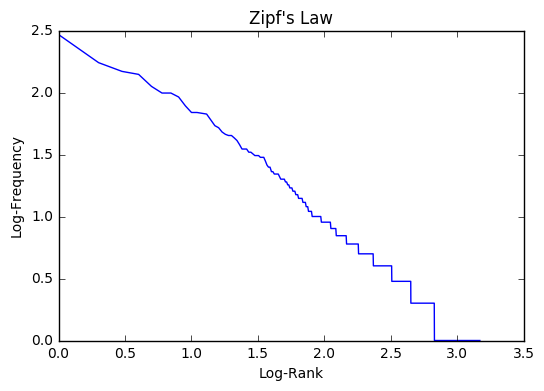

In [92]:
x=[]
y=[]
with open('data.csv','r') as file:
    reader=csv.reader(file)
    next(reader,None) #Ignoring the headers from the csv file
    for row in reader:
        x.append(math.log10(int(row[1])))
        y.append(math.log10(int(row[2])))
plt.plot(x,y)
plt.xlabel('Log-Rank')
plt.ylabel('Log-Frequency')
plt.title("Zipf's Law")
plt.show()

# Conclusion - 
- The above graph shows that the curve between Log(Frequency) vs Log(Rank) graph is almost a straight line with a slope of -1. Hence, proving the Zipf's Law.